In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import prepare as p
import acquire as a

### Exercise
Do your work for this exercise in a notebook named `explore.ipynb`. Use the techniques in the lesson to explore the **store item demand** dataset and the **opsd** dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

### Store Item Demand

In [2]:
df = a.get_merged_data()
df = p.prepare_merged_data(df)

In [3]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,year
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2013
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,2013
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,2013
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,2013
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,2013


In [4]:
df.year.value_counts()

2016    183000
2013    182500
2014    182500
2015    182500
2017    182500
Name: year, dtype: int64

#### 1. Using a human-based approach, split your dataset into train and test sets.

#### 2. Visualize your train-test split.

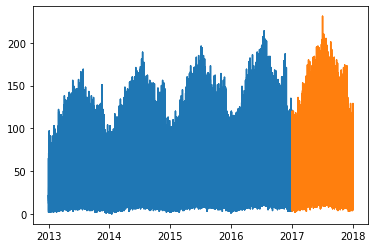

In [5]:
train = df[:'2016']
test = df['2017':]

plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)

#### Only use your train data set to perform the following tasks:

3. Resample your data and visualize it.
4. Creating a rolling (moving) average of your data and visualize it.
5. Plot the difference in sales from one day to the next.
6. Plot the % difference in sales from one day to the next.
6. Plot the % difference in sales from one week to the next.
7. Plot the % difference in sales from one month to the next.
8. Visualize an autocorrelation plot on a weekly resampling.
9. Visualize a seasonal decomposition plot on a weekly resampling.

#### Resample data and visualize it

In [6]:
y = train.sale_amount
y.head()

sale_date
2013-01-01 00:00:00+00:00    13.0
2013-01-01 00:00:00+00:00    26.0
2013-01-01 00:00:00+00:00    27.0
2013-01-01 00:00:00+00:00    54.0
2013-01-01 00:00:00+00:00    35.0
Name: sale_amount, dtype: float64

<AxesSubplot:xlabel='sale_date'>

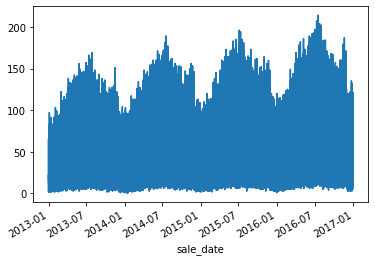

In [7]:
y.plot()

<AxesSubplot:title={'center':'1 week average'}, xlabel='sale_date'>

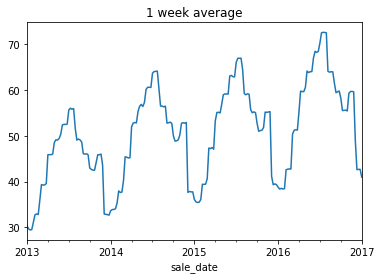

In [8]:
y.resample('1w').mean().plot(title='1 week average')

<AxesSubplot:title={'center':'1 month average'}, xlabel='sale_date'>

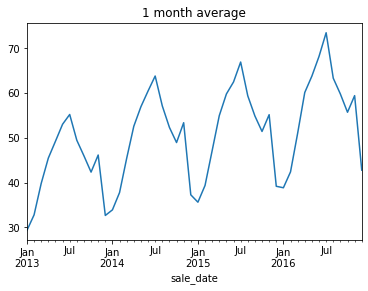

In [9]:
y.resample('1M').mean().plot(title='1 month average')

#### Combined:

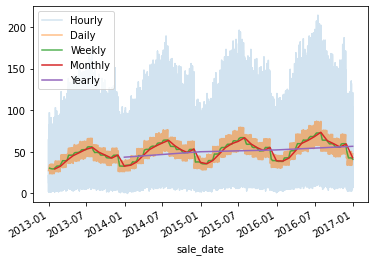

In [10]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

#### 4. Creating a rolling (moving) average of your data and visualize it.

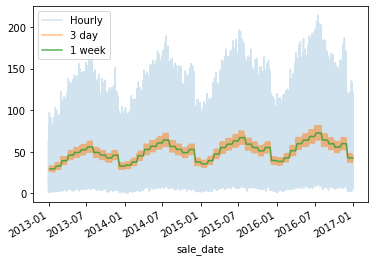

In [11]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()

#### 5. Plot the difference in sales from one day to the next.

In [12]:
y.resample('D').mean().diff()

sale_date
2013-01-01 00:00:00+00:00      NaN
2013-01-02 00:00:00+00:00   -0.036
2013-01-03 00:00:00+00:00    1.620
2013-01-04 00:00:00+00:00    2.378
2013-01-05 00:00:00+00:00    1.120
                             ...  
2016-12-27 00:00:00+00:00    5.020
2016-12-28 00:00:00+00:00    0.438
2016-12-29 00:00:00+00:00    3.102
2016-12-30 00:00:00+00:00    2.370
2016-12-31 00:00:00+00:00    2.992
Freq: D, Name: sale_amount, Length: 1461, dtype: float64

<AxesSubplot:title={'center':'Daily Difference in Sales'}, xlabel='sale_date'>

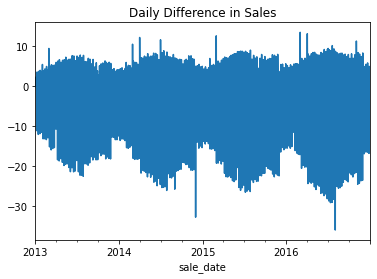

In [13]:
y.resample('D').mean().diff().plot(title='Daily Difference in Sales')

#### Plot the % difference in sales from one day to the next.

<AxesSubplot:title={'center':'Daily % Change in Sales'}, xlabel='sale_date'>

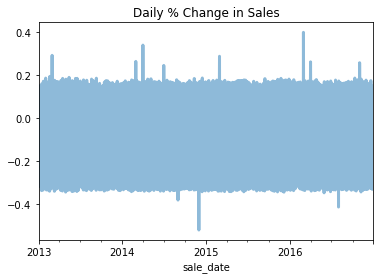

In [14]:
(y.resample('D').mean().diff() / y.resample('D').mean().shift()).plot(alpha=.5, lw=3, title='Daily % Change in Sales')

#### Plot the % difference in sales from one week to the next.

<AxesSubplot:title={'center':'Daily % Change in Sales'}, xlabel='sale_date'>

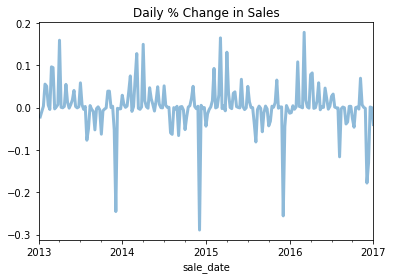

In [15]:
(y.resample('W').mean().diff() / y.resample('W').mean().shift()).plot(alpha=.5, lw=3, title='Daily % Change in Sales')

#### Plot the % difference in sales from one month to the next.

<AxesSubplot:title={'center':'Daily % Change in Sales'}, xlabel='sale_date'>

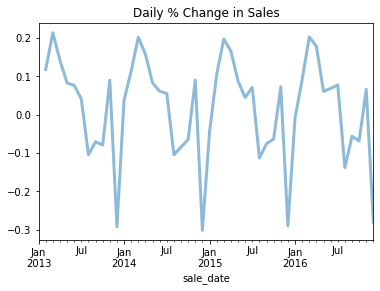

In [16]:
(y.resample('M').mean().diff() / y.resample('M').mean().shift()).plot(alpha=.5, lw=3, title='Daily % Change in Sales')

#### Visualize an autocorrelation plot on a weekly resampling.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

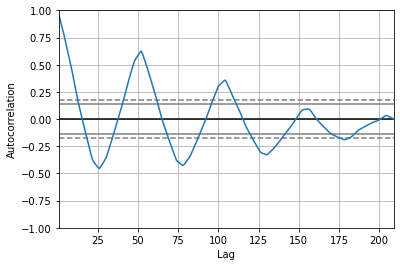

In [17]:
pd.plotting.autocorrelation_plot(train.sale_amount.resample('W').mean())

#### Visualize a seasonal decomposition plot on a weekly resampling.

In [18]:
y = train.sale_amount.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [19]:
result.seasonal

sale_date
2013-01-06 00:00:00+00:00   -14.406312
2013-01-13 00:00:00+00:00   -14.747474
2013-01-20 00:00:00+00:00   -14.840886
2013-01-27 00:00:00+00:00   -14.931698
2013-02-03 00:00:00+00:00   -14.412598
                               ...    
2016-12-04 00:00:00+00:00   -12.952398
2016-12-11 00:00:00+00:00   -13.617380
2016-12-18 00:00:00+00:00   -13.717754
2016-12-25 00:00:00+00:00   -13.903968
2017-01-01 00:00:00+00:00   -14.406312
Freq: W-SUN, Name: seasonal, Length: 209, dtype: float64

In [20]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,30.355667,NaN,-14.406312,NaN
2013-01-13 00:00:00+00:00,29.686286,NaN,-14.747474,NaN
2013-01-20 00:00:00+00:00,29.414286,NaN,-14.840886,NaN
2013-01-27 00:00:00+00:00,29.513714,NaN,-14.931698,NaN
2013-02-03 00:00:00+00:00,31.150571,NaN,-14.412598,NaN


<AxesSubplot:xlabel='sale_date'>

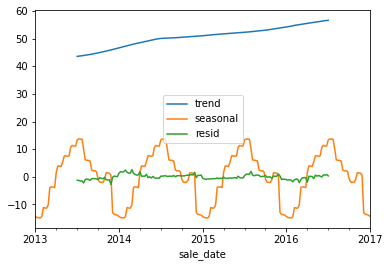

In [21]:
decomposition.iloc[:, 1:].plot()

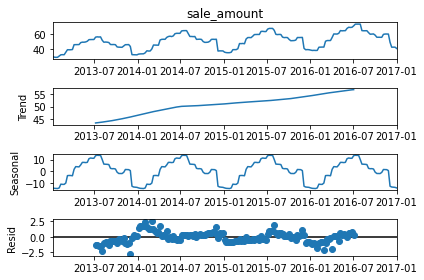

In [22]:
result.plot()
None

### OPS data
Load your OPS data using your acquire and/or prepare functions.
1. Split the data, so that train contains information up to and including 2013. The remaning data should be placed in test. 

Only use the train data set to perform the following tasks:

2. Visualize your train-test split.
3. Plot the consumption, wind, and solar data on the same chart.
4. Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.
5. Resample the consumption data to monthly and plot it.
6. Resample the consumption data to yearly and plot it.

In [23]:
df = a.get_german_power_data()
df = p.prepare_energy(df)

In [24]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [25]:
df.year.value_counts()

2008    366
2012    366
2016    366
2006    365
2007    365
2009    365
2010    365
2011    365
2013    365
2014    365
2015    365
2017    365
Name: year, dtype: int64

#### Visualize your train-test split.

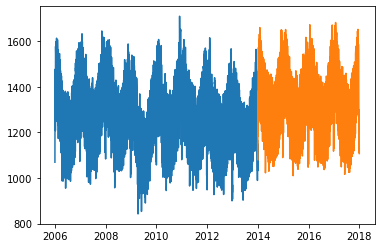

In [28]:
train = df[:'2013']
test = df['2014':]

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

#### Plot the consumption, wind, and solar data on the same chart.

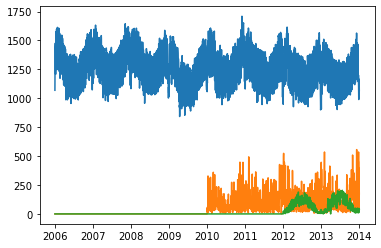

In [29]:
plt.plot(train.index, train.Consumption)
plt.plot(train.index, train.Wind)
plt.plot(train.index, train.Solar)

#### Plot only the consumption data from the year 2010. Are there any patterns you can identify? Note them in a markdown section.

In [34]:
y = df[df.year == 2010]

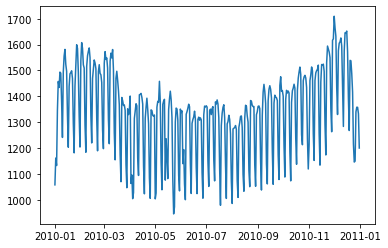

In [37]:
plt.plot(y)

##### For this year exclusively, consumption goes down during the summer but rises in the winter and as winter approaches. 

#### Resample the consumption data to monthly and plot it.

In [38]:
y1 = train.Consumption

<AxesSubplot:title={'center':'Monthly Consumption Average'}, xlabel='Date'>

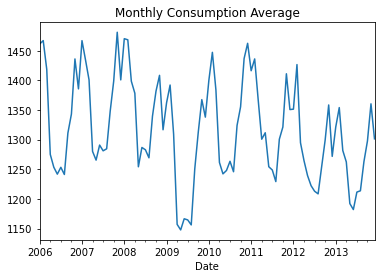

In [39]:
y1.resample('M').mean().plot(title='Monthly Consumption Average')

#### Resample the consumption data to yearly and plot it.

<AxesSubplot:title={'center':'Yearly Consumption Average'}, xlabel='Date'>

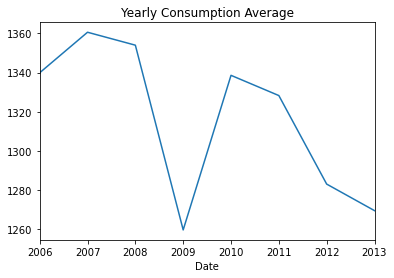

In [40]:
y1.resample('Y').mean().plot(title='Yearly Consumption Average')